In [11]:
#imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [19]:
url ='https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
df = pd.read_csv(url, sep=';')

df.head(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


In [20]:
df = df.drop(["TurId","Fylke","Linjetype","Dato","Område","Kommune","Holdeplass_Fra","Holdeplass_Til","Linjefylke","Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], axis=1)
df.head(100)

,Linjenavn,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,150,0,112,5
1,150,0,112,5
2,150,0,112,6
3,150,1,112,10
4,150,1,112,10
...,...,...,...,...
95,240,1,69,5
96,440,0,106,1
97,110,1,106,-2
98,440,0,106,2


In [21]:
df_bin = pd.get_dummies(df, drop_first=True)
df_bin.head(10)

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord,Linjenavn_110,Linjenavn_110E,Linjenavn_115E,Linjenavn_120,Linjenavn_125E,Linjenavn_130,Linjenavn_140,...,Linjenavn_490,Linjenavn_490E,Linjenavn_4B,Linjenavn_54,Linjenavn_550,Linjenavn_5N,Linjenavn_60,Linjenavn_67,Linjenavn_74,Linjenavn_91
0,0,112,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,112,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,112,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,112,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,112,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,151,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,112,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,112,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,112,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


150


<AxesSubplot:>

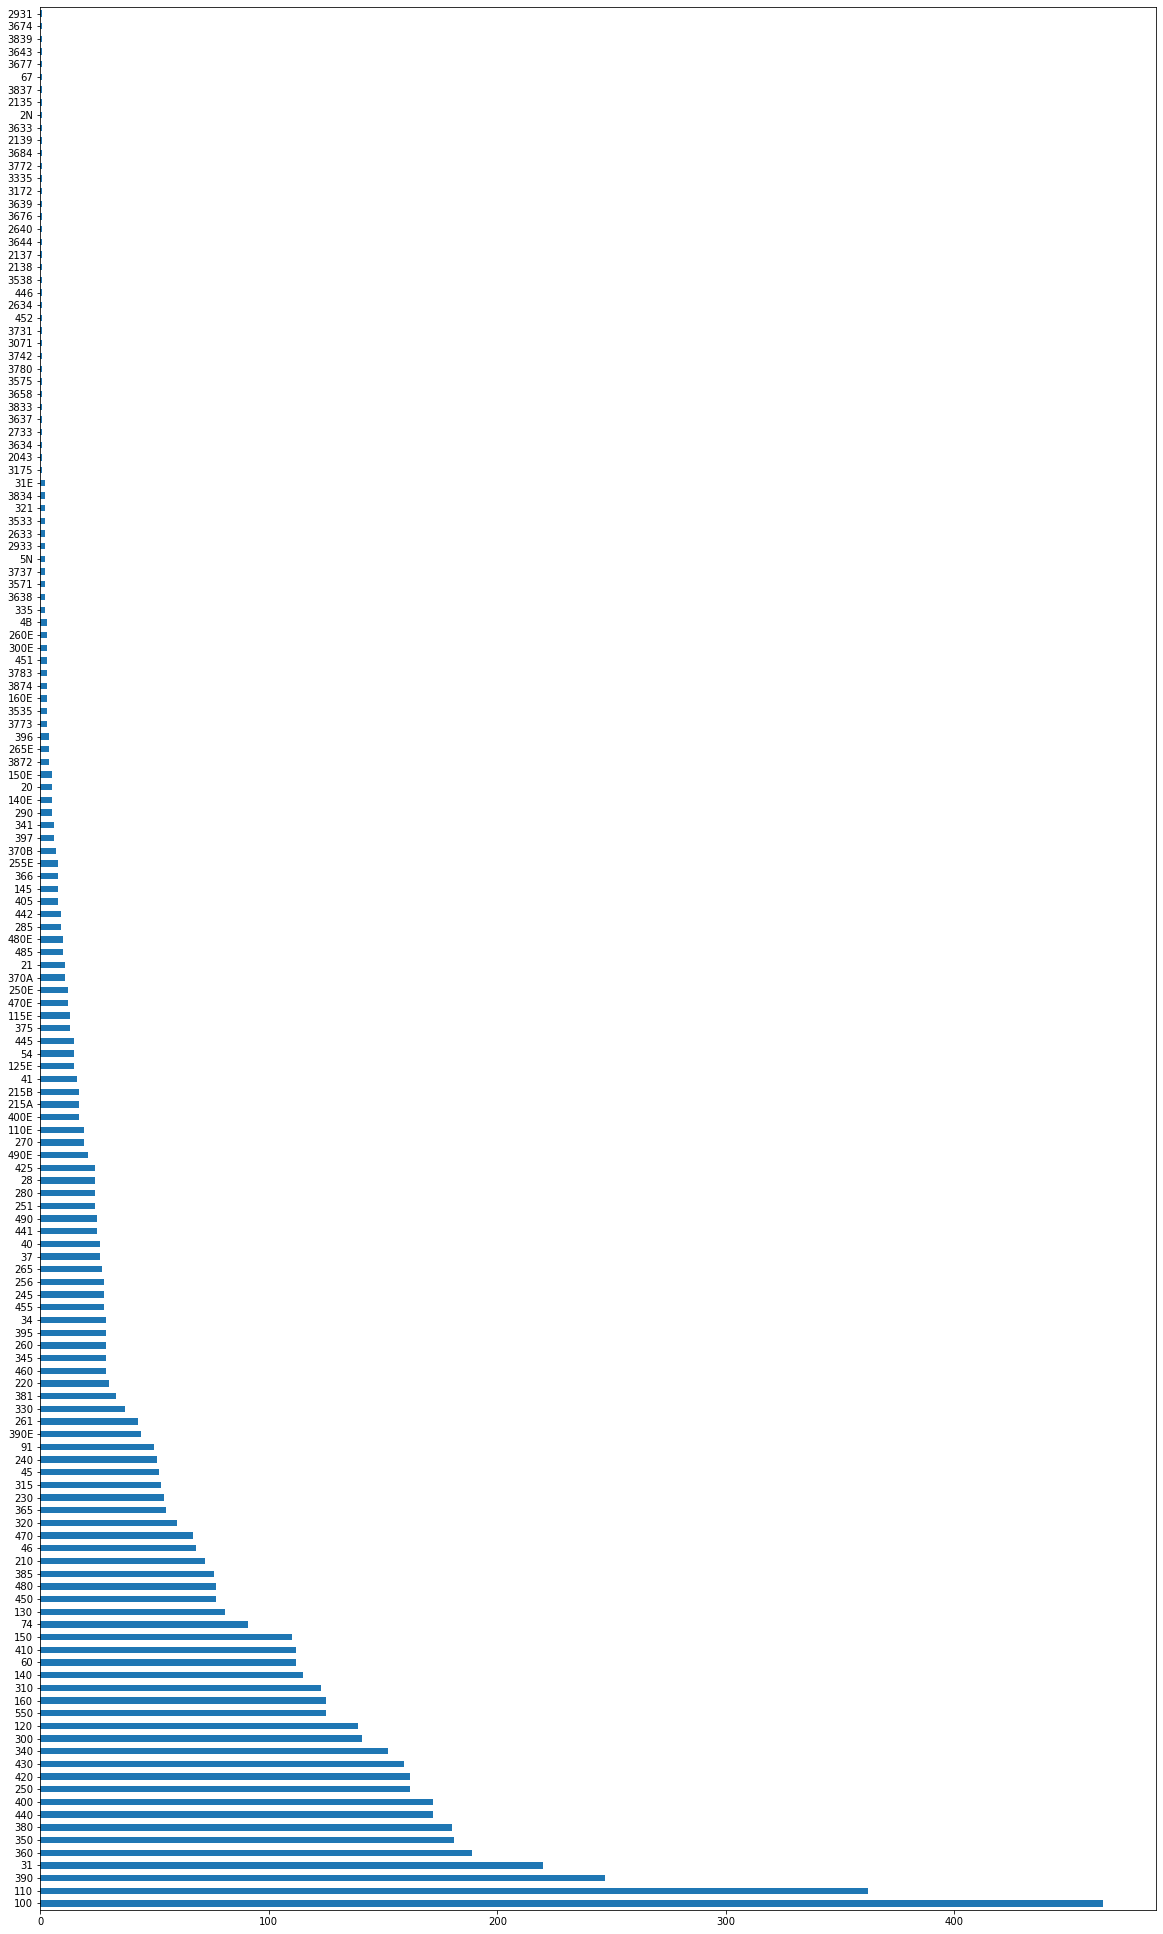

In [22]:
n = len(pd.unique(df['Linjenavn']))
print(n)
df['Linjenavn'].value_counts().head(n).plot(kind='barh',figsize=(20,35))